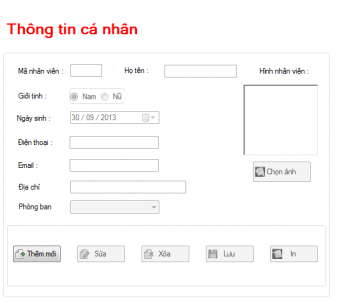


In [ ]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox
import tkinter as tk
#----Tạo Windows
windows = Tk()
windows.title("Quản lý nhân sự")
#windows.geometry('620x200')
#--Tạo Label

manv_lbl = Label(windows, text="Mã NV:")
hoten_lbl = Label(windows, text="Họ và tên:")
gioitinh_lbl = Label(windows, text = "Giới tính:")
ngaysinh_lbl = Label(windows, text = "Ngày sinh:")
dienthoai_lbl = Label(windows,text="Điện thoại:")
email_lbl = Label(windows, text="Email:")
diachi_lbl = Label(windows,text="Địa chỉ")
hstn_lbl = Label(windows,text="Hệ số thu nhập")

#----Tạo biến
manv = StringVar()
hoten = StringVar()
gioitinh = StringVar()
ngaysinh = StringVar()
dienthoai = StringVar()
email = StringVar()
diachi = StringVar()
hstn = StringVar()
var = IntVar()
gioitinh = StringVar()
employees = []
#-----Các hàm
n = int()

def define():
    global gioi_tinh
    if var.get() == 0:
        gioi_tinh = "Nữ"
    else:
        gioi_tinh = "Nam"
def clear_entry():
    entry_manv.delete(0,"end")
    entry_hoten.delete(0,"end")
    entry_ngaysinh.delete(0,"end")
    entry_dienthoai.delete(0,"end")
    entry_email.delete(0,"end")
    entry_diachi.delete(0,"end")
    entry_hstn.delete(0,"end")

    
def add():
    global employees
    global tree
    check = False
    for emp in employees:
       if emp[0] == entry_manv.get():
        check = True
    if check == False:
        employees.append((entry_manv.get(),
                         entry_hoten.get(),
                         entry_ngaysinh.get(),
                         gioi_tinh,
                         entry_dienthoai.get(),
                         entry_email.get(),
                         entry_diachi.get(),
                         entry_hstn.get()))
        n = len(employees) - 1
        tree.insert('', tk.END, values=employees[n])
        clear_entry()
    else:
        messagebox.showwarning("Cảnh báo", "Mã nhân viên đã tồn tại, bạn hãy nhập mã nhân viên khác")
def edit():
    for nv in employees:
        if nv[0] == entry_manv.get():
            employees.remove(nv)
            employees.append((entry_manv.get(),
                     entry_hoten.get(),
                     entry_ngaysinh.get(),
                     gioi_tinh,
                     entry_dienthoai.get(),
                     entry_email.get(),
                     entry_diachi.get(),
                     entry_hstn.get()))
    n = len(employees) - 1
    for item in tree.get_children():
        tree.delete(item)
    for emp in employees:
        tree.insert('', tk.END, values=emp)
    clear_entry()

def delete():
    for nv in employees:
        if nv[0] == entry_manv.get():
             employees.remove(nv)   
    for item in tree.get_children():
        tree.delete(item)
    for emp in employees:
        tree.insert('', tk.END, values=emp)
  

def salary():
    luong = float()
    luong = float(entry_hstn.get()) * 1000000
    messagebox.showinfo("Lương", f"Lương của nhân viên {entry_hoten.get()} là : {luong}")


#----Bảng dữ liệu
#Xác định bảng
columns = ('ma_nv', 'ho_ten', 'ngay_sinh', 'gioi_tinh', 'dien_thoai', 'email','dia_chi','hstn')
tree = ttk.Treeview(windows, columns=columns, show='headings')
tree.heading('ma_nv', text='Mã NV')
tree.heading('ho_ten', text='Họ tên')
tree.heading('ngay_sinh', text='Ngày sinh')
tree.heading('gioi_tinh', text='Giới tính')
tree.heading('dien_thoai', text='Điện thoại')
tree.heading('email', text='Email')
tree.heading('dia_chi', text='Địa chỉ')
tree.heading('hstn', text='Hệ số thu nhập')
tree.column('#0', stretch=NO, minwidth=0, width=30)
tree.column('#1', stretch=NO, minwidth=0, width=30)
tree.column('#2', stretch=NO, minwidth=0, width=80)
tree.column('#3', stretch=NO, minwidth=0, width=120)
tree.column('#4', stretch=NO, minwidth=0, width=90)
tree.column('#5', stretch=NO, minwidth=0, width=80)
tree.column('#6', stretch=NO, minwidth=0, width=120)
tree.column('#7', stretch=NO, minwidth=0, width=120)
tree.column('#8', stretch=NO, minwidth=0, width=120)
def item_selected(event):
    for selected_item in tree.selection():
        item = tree.item(selected_item)
        record = item['values']
        # show a message
        #showinfo(title='Information', message=','.join([str(i) for i in record]))
        entry_manv.delete(0,"end")
        entry_manv.insert(0,record[0])
        entry_hoten.delete(0,"end")
        entry_hoten.insert(0,record[1])
        entry_ngaysinh.delete(0,"end")
        entry_ngaysinh.insert(0,record[2])
        entry_dienthoai.delete(0,"end")
        entry_dienthoai.insert(0,record[4])
        entry_email.delete(0,"end")
        entry_email.insert(0,record[5])
        entry_diachi.delete(0,"end")
        entry_diachi.insert(0,record[6])
        entry_hstn.delete(0,"end")
        entry_hstn.insert(0,record[7])
tree.bind('<<TreeviewSelect>>', item_selected)

#-----------

entry_manv = Entry(windows,textvariable=manv, font=('Times New Roman', 14))
entry_hoten = Entry(windows,textvariable=hoten, font=('Times New Roman', 14))
entry_ngaysinh = Entry(windows,textvariable=ngaysinh, font=('Times New Roman', 14))
entry_dienthoai = Entry(windows,textvariable=dienthoai, font=('Times New Roman', 14))
entry_email = Entry(windows,textvariable=email, font=('Times New Roman', 14))
entry_diachi = Entry(windows,textvariable=diachi, font=('Times New Roman', 14))
entry_hstn = Entry(windows,textvariable=hstn, font=('Times New Roman', 14))

add_btn = Button(windows,text="Thêm", command = add)
find_btn = Button(windows,text="Sửa", command = edit)
delete_btn = Button(windows,text="Xóa", command = delete)
salary_btn = Button(windows,text="Tính lương", command = salary)

gioitinhnam_rdbtn = Radiobutton(windows,variable=var, text="Nam", value=1, command = define)
gioitinhnu_rdbtn = Radiobutton(windows, variable=var, text="Nữ", value=0, command = define)

manv_lbl.grid(row=0, column=0)
entry_manv.grid(row=0, column = 1)
hoten_lbl.grid(row=1,column=0)
entry_hoten.grid(row=1,column=1)

gioitinh_lbl.grid(row=2,column=0)
gioitinhnam_rdbtn.grid(row=2,column=1)
gioitinhnu_rdbtn.grid(row=2,column=2)
ngaysinh_lbl.grid(row=3,column=0)
entry_ngaysinh.grid(row=3,column=1)
dienthoai_lbl.grid(row=4,column=0)
entry_dienthoai.grid(row=4,column=1)
email_lbl.grid(row=5,column=0)
entry_email.grid(row=5,column=1)
diachi_lbl.grid(row=6,column=0)
entry_diachi.grid(row=6,column=1)
hstn_lbl.grid(row=7,column=0)
entry_hstn.grid(row=7,column=1)

add_btn.grid(row=8,column=0)
find_btn.grid(row=8,column=1)
delete_btn.grid(row=8,column=2)
salary_btn.grid(row=8,column=8)
tree.grid(row=9, column=0,columnspan=4, sticky='nsew')
windows.mainloop()